In [1]:
import pandas as pd, scipy.stats as stats, seaborn as sns, matplotlib.pyplot as plt
import ast

url = "https://raw.githubusercontent.com/nkmwicz/worldcup2018data/refs/heads/main/cleaned_events_world_cup2018.csv"

df = pd.read_csv(url)
df["tags"] = df["tags"].apply(ast.literal_eval)
print(ast.literal_eval)
df.head()

<function literal_eval at 0x000002176B2AE5C0>


,eventId,subEventName,tags,playerId,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,x1,y1,x2,y2
0,8,Simple pass,[Accurate],Mohammad Ibrahim Al Sahlawi,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,1.656214,Simple pass,258612104,50,50,35.0,53.0
1,8,High pass,[Accurate],Abdullah Ibrahim Otayf,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,4.487814,High pass,258612106,35,53,75.0,19.0
2,1,Air duel,"[Won, Accurate]",Ilya Kutepov,"Russia - Saudi Arabia, 5 - 0",Duel,Russia,1H,5.937411,Air duel,258612077,25,81,37.0,83.0
3,1,Air duel,"[Lost, Not accurate]",Yasir Gharsan Al Shahrani,"Russia - Saudi Arabia, 5 - 0",Duel,Saudi Arabia,1H,6.406961,Air duel,258612112,75,19,63.0,17.0
4,8,Simple pass,[Accurate],Salman Mohammed Al Faraj,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,8.562167,Simple pass,258612110,63,17,71.0,15.0


In [2]:
# function to return win, loss, tie
def get_outcome(row):
    matchId = row["matchId"]
    teamId = row["teamId"]

    teams, scores = matchId.split(",")
    home, away = teams.split("-")
    home_score, away_score = scores.split("-")
    away_score = away_score.split("(")[0]
    home_score = int(home_score)
    away_score = int(away_score)
    if home_score == away_score:
        return "tie"
    if home_score > away_score:
        if home.strip().lower() == teamId.strip().lower():
            return "win"
        else:
            return "loss"
    else:
        if away.strip().lower() == teamId.strip().lower():
            return "win"
        else:
            return "loss"


df["outcome"] = df[["matchId", "teamId"]].apply(get_outcome, axis=1)
df.head()

,eventId,subEventName,tags,playerId,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,x1,y1,x2,y2,outcome
0,8,Simple pass,[Accurate],Mohammad Ibrahim Al Sahlawi,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,1.656214,Simple pass,258612104,50,50,35.0,53.0,loss
1,8,High pass,[Accurate],Abdullah Ibrahim Otayf,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,4.487814,High pass,258612106,35,53,75.0,19.0,loss
2,1,Air duel,"[Won, Accurate]",Ilya Kutepov,"Russia - Saudi Arabia, 5 - 0",Duel,Russia,1H,5.937411,Air duel,258612077,25,81,37.0,83.0,win
3,1,Air duel,"[Lost, Not accurate]",Yasir Gharsan Al Shahrani,"Russia - Saudi Arabia, 5 - 0",Duel,Saudi Arabia,1H,6.406961,Air duel,258612112,75,19,63.0,17.0,loss
4,8,Simple pass,[Accurate],Salman Mohammed Al Faraj,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,8.562167,Simple pass,258612110,63,17,71.0,15.0,loss


In [ ]:
# first started with just passes starting in A3
# decided to find accurate.

df["pass_a3"] = (
    (df["eventName"] == "Pass")
    & (df["x1"] > 66)
    & (df["x2"] > df["x1"]) # new line
    & (df["tags"].apply(lambda x: "Accurate" in x))  # Fixed line
)

In [ ]:
# df["tags"].includes

AttributeError: 'Series' object has no attribute 'includes'

In [4]:
df.head()

,eventId,subEventName,tags,playerId,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,x1,y1,x2,y2,outcome,pass_a3
0,8,Simple pass,[Accurate],Mohammad Ibrahim Al Sahlawi,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,1.656214,Simple pass,258612104,50,50,35.0,53.0,loss,False
1,8,High pass,[Accurate],Abdullah Ibrahim Otayf,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,4.487814,High pass,258612106,35,53,75.0,19.0,loss,False
2,1,Air duel,"[Won, Accurate]",Ilya Kutepov,"Russia - Saudi Arabia, 5 - 0",Duel,Russia,1H,5.937411,Air duel,258612077,25,81,37.0,83.0,win,False
3,1,Air duel,"[Lost, Not accurate]",Yasir Gharsan Al Shahrani,"Russia - Saudi Arabia, 5 - 0",Duel,Saudi Arabia,1H,6.406961,Air duel,258612112,75,19,63.0,17.0,loss,False
4,8,Simple pass,[Accurate],Salman Mohammed Al Faraj,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,8.562167,Simple pass,258612110,63,17,71.0,15.0,loss,False


In [5]:
group_df = (
    df.groupby(["matchId", "teamId"])
    .agg(
        passes=("pass_a3", "sum"),
        outcome=("outcome", "first"),
    )
    .reset_index()
)
group_df

,matchId,teamId,passes,outcome
0,"Argentina - Croatia, 0 - 3",Argentina,22,loss
1,"Argentina - Croatia, 0 - 3",Croatia,11,win
2,"Argentina - Iceland, 1 - 1",Argentina,91,tie
3,"Argentina - Iceland, 1 - 1",Iceland,16,tie
4,"Australia - Peru, 0 - 2",Australia,48,loss
...,...,...,...,...
123,"Uruguay - Portugal, 2 - 1",Uruguay,21,win
124,"Uruguay - Russia, 3 - 0",Russia,28,loss
125,"Uruguay - Russia, 3 - 0",Uruguay,26,win
126,"Uruguay - Saudi Arabia, 1 - 0",Saudi Arabia,55,loss


<Axes: xlabel='outcome', ylabel='passes'>

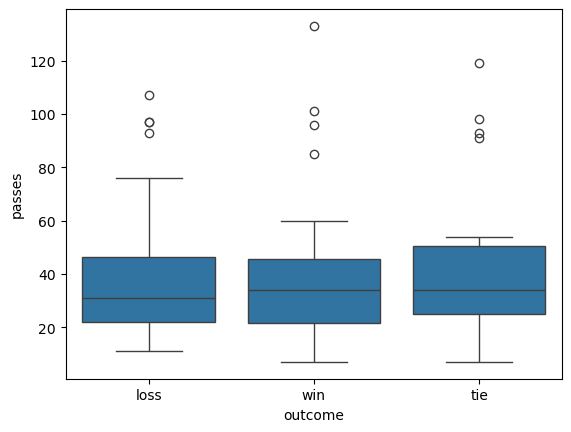

In [6]:
sns.boxplot(data=group_df, y="passes", x="outcome")

In [7]:
u_outcomes = group_df["outcome"].unique()  # ["win", "loss", "tie"]
values_list = [
    group_df.loc[group_df["outcome"] == outcome, "passes"] for outcome in u_outcomes
]
# values_list

In [8]:
f, p = stats.f_oneway(*values_list)
print(f"f={f:.2f}, p={p:.2f}")

f=0.40, p=0.67


In [9]:
# Correlation passes-A3 to goals
# add goals column
df['goal'] = df.apply(lambda row: row['eventName'] == 'Shot' and 'Goal' in row['tags'], axis=1).astype(int)
df['goal'].sum()

np.int64(128)

In [12]:
tags = set([tag for l in df['tags'] for tag in l])
tags

{'Accurate',
 'Anticipated',
 'Anticipation',
 'Assist',
 'Blocked',
 'Counter attack',
 'Dangerous ball lost',
 'Direct',
 'Fairplay',
 'Feint',
 'Free space left',
 'Free space right',
 'Goal',
 'Head/body',
 'High',
 'Indirect',
 'Interception',
 'Key pass',
 'Left foot',
 'Lost',
 'Missed ball',
 'Neutral',
 'Not accurate',
 'Opportunity',
 'Own goal',
 'Position: Goal center',
 'Position: Goal center left',
 'Position: Goal center right',
 'Position: Goal high center',
 'Position: Goal high left',
 'Position: Goal high right',
 'Position: Goal low center',
 'Position: Goal low left',
 'Position: Goal low right',
 'Position: Out center left',
 'Position: Out center right',
 'Position: Out high center',
 'Position: Out high left',
 'Position: Out high right',
 'Position: Out low left',
 'Position: Out low right',
 'Position: Post center left',
 'Position: Post center right',
 'Position: Post high center',
 'Position: Post high left',
 'Position: Post high right',
 'Position: Post lo

In [14]:
p_g_group = df.groupby(['matchId', 'teamId']).agg(
    passes=('pass_a3', 'sum'),
    goals=('goal', 'sum')
).reset_index()
p_g_group

,matchId,teamId,passes,goals
0,"Argentina - Croatia, 0 - 3",Argentina,22,0
1,"Argentina - Croatia, 0 - 3",Croatia,11,3
2,"Argentina - Iceland, 1 - 1",Argentina,91,1
3,"Argentina - Iceland, 1 - 1",Iceland,16,1
4,"Australia - Peru, 0 - 2",Australia,48,0
...,...,...,...,...
123,"Uruguay - Portugal, 2 - 1",Uruguay,21,2
124,"Uruguay - Russia, 3 - 0",Russia,28,0
125,"Uruguay - Russia, 3 - 0",Uruguay,26,1
126,"Uruguay - Saudi Arabia, 1 - 0",Saudi Arabia,55,0


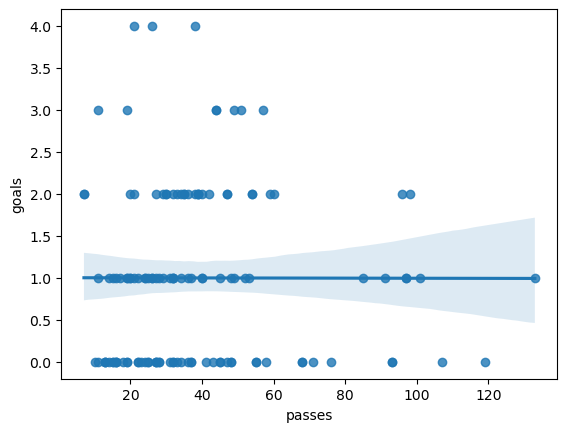

In [15]:
rplot = sns.regplot(data=p_g_group, x="passes", y="goals")

In [16]:
passes_a3 = p_g_group['passes']
goals_pg = p_g_group['goals']
r, p = stats.pearsonr(passes_a3, goals_pg)
print(f"r={r:.4f}, p={p:.4f}")

r=-0.0015, p=0.9862


In [17]:
# t-test with soft wins

def get_soft_outcome(row):
    matchId = row["matchId"]
    teamId = row["teamId"]

    teams, scores = matchId.split(",")
    home, away = teams.split("-")
    home_score, away_score = scores.split("-")
    away_score = away_score.split("(")[0]
    home_score = int(home_score)
    away_score = int(away_score)
    if home_score == away_score:
        return "soft-win"
    if home_score > away_score:
        if home.strip().lower() == teamId.strip().lower():
            return "soft-win"
        else:
            return "soft-loss"
    else:
        if away.strip().lower() == teamId.strip().lower():
            return "soft-win"
        else:
            return "soft-loss"

df['soft-outcome'] = df.apply(get_soft_outcome, axis=1)
df.head()


,eventId,subEventName,tags,playerId,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,x1,y1,x2,y2,outcome,pass_a3,goal,soft-outcome
0,8,Simple pass,[Accurate],Mohammad Ibrahim Al Sahlawi,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,1.656214,Simple pass,258612104,50,50,35.0,53.0,loss,False,0,soft-loss
1,8,High pass,[Accurate],Abdullah Ibrahim Otayf,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,4.487814,High pass,258612106,35,53,75.0,19.0,loss,False,0,soft-loss
2,1,Air duel,"[Won, Accurate]",Ilya Kutepov,"Russia - Saudi Arabia, 5 - 0",Duel,Russia,1H,5.937411,Air duel,258612077,25,81,37.0,83.0,win,False,0,soft-win
3,1,Air duel,"[Lost, Not accurate]",Yasir Gharsan Al Shahrani,"Russia - Saudi Arabia, 5 - 0",Duel,Saudi Arabia,1H,6.406961,Air duel,258612112,75,19,63.0,17.0,loss,False,0,soft-loss
4,8,Simple pass,[Accurate],Salman Mohammed Al Faraj,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,8.562167,Simple pass,258612110,63,17,71.0,15.0,loss,False,0,soft-loss


In [19]:
soft_group = df.groupby(['matchId', 'teamId']).agg(
    passes=('pass_a3', 'sum'),
    soft_outcome=('soft-outcome', 'first')
).reset_index()
soft_group

,matchId,teamId,passes,soft_outcome
0,"Argentina - Croatia, 0 - 3",Argentina,22,soft-loss
1,"Argentina - Croatia, 0 - 3",Croatia,11,soft-win
2,"Argentina - Iceland, 1 - 1",Argentina,91,soft-win
3,"Argentina - Iceland, 1 - 1",Iceland,16,soft-win
4,"Australia - Peru, 0 - 2",Australia,48,soft-loss
...,...,...,...,...
123,"Uruguay - Portugal, 2 - 1",Uruguay,21,soft-win
124,"Uruguay - Russia, 3 - 0",Russia,28,soft-loss
125,"Uruguay - Russia, 3 - 0",Uruguay,26,soft-win
126,"Uruguay - Saudi Arabia, 1 - 0",Saudi Arabia,55,soft-loss


In [20]:
soft_wins = soft_group.loc[soft_group['soft_outcome']=='soft-win', 'passes']
soft_losses = soft_group.loc[soft_group['soft_outcome']=='soft-loss', 'passes']

t, p = stats.ttest_ind(soft_wins, soft_losses)
print(f"t={t:.4f}, p={p:.4f}")

t=0.2598, p=0.7955


In [ ]:
# goals after transition